In [1]:
from flow import*

/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
w1 = lambda z: torch.sin((2 * np.pi * z[:, 0]) / 4)
w2 = lambda z: 3 * torch.exp(-(((z[:, 0] - 1) / 0.6) ** 2) / 2)
w3 = lambda z: 3 * 1 / (1 + torch.exp(- ((z[:, 0] - 1) / 0.3)))
# Energy functions
U1 = lambda z: (((torch.sqrt(z[:, 0] ** 2 + z[:, 1] ** 2) - 2) / 0.4) ** 2) / 2 - torch.log(
    1e-15 + (torch.exp(-(((z[:, 0] - 2) / 0.6) ** 2) / 2) + torch.exp(-(((z[:, 0] + 2) / 0.6) ** 2) / 2)))
U2 = lambda z: (((z[:, 1] - w1(z)) / 0.4) ** 2) / 2
U3 = lambda z: - torch.log(1e-15 + torch.exp(-(((z[:, 1] - w1(z)) / 0.35) ** 2) / 2) + torch.exp(
    -(((z[:, 1] - w1(z) + w2(z)) / 0.35) ** 2) / 2))
U4 = lambda z: - torch.log(1e-15 + torch.exp(-(((z[:, 1] - w1(z)) / 0.4) ** 2) / 2) + torch.exp(
    -(((z[:, 1] - w1(z) + w3(z)) / 0.35) ** 2) / 2))

  0%|          | 0/20000 [00:00<?, ?it/s]/home/yubaes/Desktop/mlpapers/Variational Inference with Normalizing Flows/flow.py:33: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  wTu = torch.matmul(self.w.T,self.u)
100%|██████████| 20000/20000 [01:47<00:00, 186.61it/s]
/home/yubaes/Desktop/mlpapers/Variational Inference with Normalizing Flows/flow.py:105: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  rasterized=Tru

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

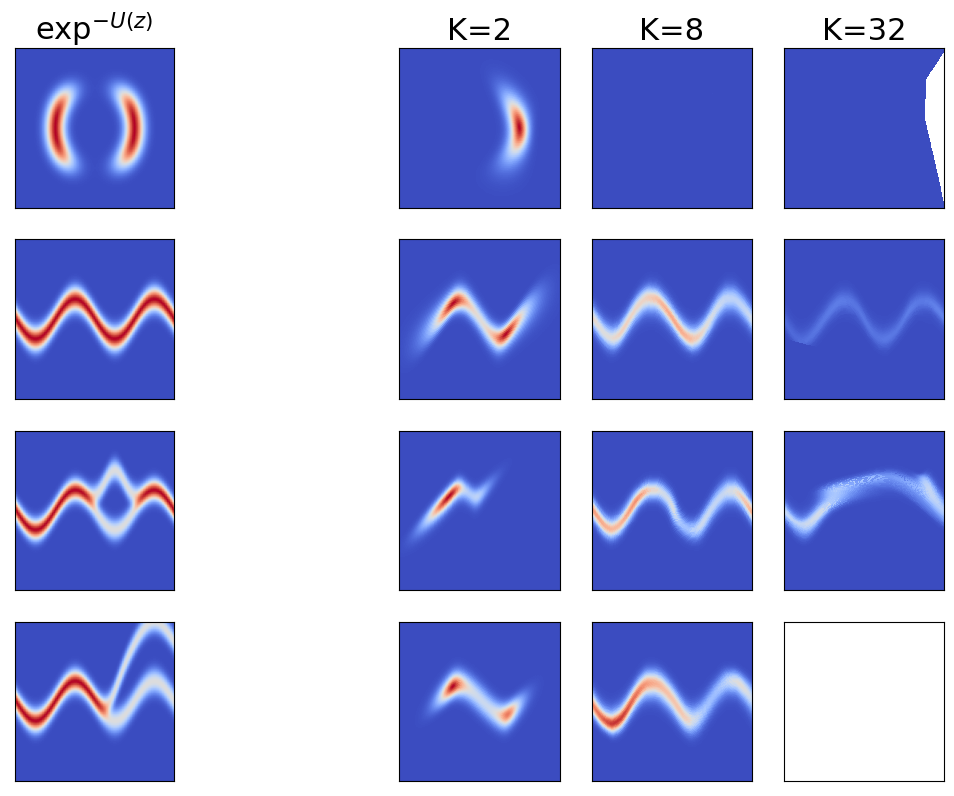

In [3]:
data_dim = 2
index = 1

plt.figure(figsize=(12, 12))
for U in [U1, U2, U3, U4]:
    exact_log_density = lambda z: - U(z)

    # Plot the exact density
    ax = plt.subplot(5, 5, index); plt.xticks([], []); plt.yticks([], [])
    plot_exact_density(ax, exact_log_density, title=r'$\exp^{-U(z)}$' if index == 1 else None)
    index += 2

    for flow_length in [2, 8, 32]:
        flow = NormalizingFlow(flow_length, data_dim).to(device)
        optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)
        loss = train(flow, optimizer, 20000, exact_log_density, 4096, data_dim)

        # Plot the learned density
        ax = plt.subplot(5, 5, index); plt.xticks([], []); plt.yticks([], [])
        plot_flow_density(flow, ax, title=f'K={flow_length}' if index <= 5 else None)
        index += 1
plt.savefig('Imgs/learned_densities.pdf')
plt.show()